### TODO
- LOWESS : find a way to have a (M,1) shaped proximity weights as a class parameter
- LOWESS : Explain and document why prox weights ( 500, 500)
- ALL :   <s>reshape Entry Data</s>(reshaped) ,or make sure its the same shape

## ERRORS

<details>
<summary>error 1</summary>
1
</details>


## Notes
- when using the Stochastic gradient descent or the Mini-Batch, we can notice that the cost function oscillate alot when there is noise in the data. the less noise there is the smother the cost function curve is.


In [1]:
# IMPORTS
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as llr
from sklearn.metrics import r2_score

# Custom imports
from LinearRegression import LinearRegression
from LocallyWeightedRegression import LocallyWeightedRegression
import utils


In [2]:
# HELPER FUNCTIONS

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2,dtype=np.float64)

def r2_score_custom(y_pred, y_true):

    y_avg = np.mean(y) 

    return (1-(np.sum(np.square(y_pred- y_true))/np.sum(np.square(y_pred- y_avg))))

In [8]:
# DATASET CREATION, DATASET SPLIT

# Data -- 1
# X, y = datasets.make_regression(n_samples=400, n_features=1, noise=10, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Data -- 2
# np.random.seed(8)
# X_train = np.random.randn(500,1)
# y_train = 2*(X_train**2) + 10 + 4.6*np.random.randn(500,1)
# # y_train = y_train.reshape(y_train.shape[0])
# X = X_train
# y= y_train

# print(X.shape)
# print(y.shape)

# Data -- 3
np.random.seed(8)
X = np.random.randn(1000,1)
y = 3*(X**3) + 2*(X**2) + 10 + 4.6*np.random.randn(1000,1)
y = y.reshape(y.shape[0])
X_train = X
y_train = y


# Data -- 4
# np.random.seed(0) # permet de reproduire l'aléatoire
# X, y = datasets.make_regression(n_samples=1000, n_features=1, noise = 10) # creation d'un dataset (x, y) linéaire
# y = y + abs(y/2) # modifie les valeurs de y pour rendre le dataset non-linéaire
# y = y.reshape(y.shape[0])
# X_train = X
# y_train = y


### Linear Regression

In [9]:
# Model Creation, Fitting parameters, Model predictions


# MLFromscratch Linear Reg
LinReg = LinearRegression(n_iters=5000, optm_algo="MBGD")
LinReg.fit(X_train,y_train)
fit_line_1 = LinReg.predict(X_train)
# preds_1 = LinReg.predict(X_test)

# SKlearn Linear Reg
reg = llr().fit(X_train,y_train)
fit_line_2 = reg.predict(X_train)
# preds_2 = reg.predict(X_test)

print(f" r2_score MLFromscratch : {r2_score(fit_line_1,y_train)}")
print(f" r2_score SKlearn : {r2_score(fit_line_2,y_train)}")

print(f" r2_score_custom MLFromscratch : {r2_score_custom(fit_line_1,y_train)}")
print(f" r2_score_custom SKlearn : {r2_score_custom(fit_line_2,y_train)}")

X     --> shape: (1000, 1)
y     --> shape: (1000,)
THETA --> shape: (1,)
Running mini-batch G.D ...
 r2_score MLFromscratch : -0.4686755389179593
 r2_score SKlearn : 0.08845559367894984
 r2_score_custom MLFromscratch : -0.3452026629997489
 r2_score_custom SKlearn : 0.08845559367894984


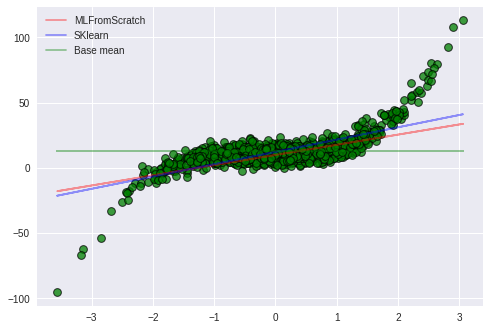

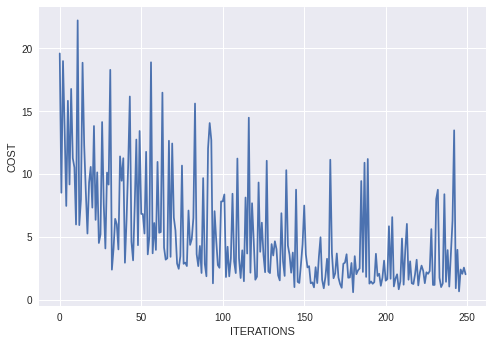

In [14]:
# VISUALIZATION


plt.style.use("seaborn")

# Plot all data point of the first Feature (1D data) & the fitline (regression line)
plt.scatter(X[:,0], y, s=60, color="green", edgecolor="black", linewidth=1, alpha=0.75)
plt.plot(X_train, fit_line_1, color="red", alpha=0.4, label='MLFromScratch')
plt.plot(X_train, fit_line_2, color="blue", alpha=0.4, label='SKlearn')
# mean base model that R2 score is comparing to
plt.plot(X_train, np.repeat(np.mean(y_train),y_train.shape[0]), color="green", alpha=0.4, label='Base mean')

plt.legend(loc="upper left")
plt.show()

# Plot the Cost function variation for each iteration
plt.xlabel("ITERATIONS")
plt.ylabel("COST")
plt.plot(LinReg.costs)

if LinReg.optm_algo == "SGD":
    # Moving Average Plot
    window = 20
    moving_average = []
    for ind in range(len(LinReg.costs) - window + 1):
        moving_average.append(np.mean(LinReg.costs[ind:ind+window]))

    plt.plot(moving_average, color="red")



### Locally Weighted Regression (LOWESS)

In [15]:
# MLFromscratch LOWESS

lwr = LocallyWeightedRegression(tau = 0.7)
predictions, fitline = lwr.predict(X,y, x_new = [-2,2])
# must be shape (xx,) for graph

print(len(fitline))
print(lwr.weights)
print(lwr.bias)
print(lwr.proximity_weights)

X_new : [-2] -- predicted value : -2.1703511070858195
X_new : [2] -- predicted value : 37.669793664958405
2
[12.80163978]
12.066514112345562
[2.42859675e-02 4.30581155e-01 1.24806074e-07 8.28229069e-06
 6.59752491e-09 8.42491255e-01 9.27201056e-01 9.58201472e-01
 2.27164226e-01 3.43318845e-01 3.22810889e-05 9.92887612e-01
 4.75249648e-05 7.15933371e-04 3.11343055e-03 3.51901587e-04
 2.65225732e-01 6.23249138e-03 1.28548230e-02 6.89039719e-03
 6.47079322e-01 9.73219504e-04 8.03593490e-03 7.93172281e-02
 1.28527927e-06 1.84762785e-03 1.12070655e-01 4.91884214e-01
 3.17972165e-02 6.82438626e-04 7.28242065e-01 6.50171102e-03
 1.91582736e-02 3.42922205e-02 1.30036466e-02 1.37212012e-03
 9.30530263e-02 3.64701063e-05 1.69141197e-03 2.68638989e-03
 1.52839419e-04 2.36597268e-02 2.97119137e-02 2.28434287e-02
 8.72433918e-03 1.17314909e-01 9.13384718e-01 3.64944524e-01
 2.06578412e-12 4.69769630e-01 2.30972680e-07 4.68767695e-07
 2.79648217e-02 1.05594452e-05 8.16273860e-01 1.76833045e-01
 3.14

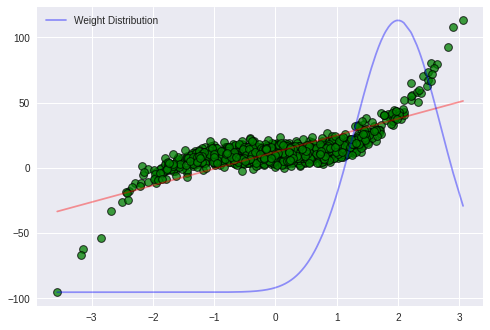

In [19]:
# VISUALIZATION

plt.style.use("seaborn")
fig, ax = plt.subplots()

# Plot all data point of the first Feature (1D data) & the Local fitline (regression line)
# X[:,0] from [[x],[x]] to [x,x] <class 'numpy.ndarray'>
ax.scatter(X[:,0], y, s=60, color="green", edgecolor="black", linewidth=1, alpha=0.75)
plt.plot( [min(X[:,0]), max(X[:,0])] , fitline, color="red", alpha=0.4, label="fitline")

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()
# Plot the weight distribution around the point to predict
xplot ,yplot = utils.argsort(X[:,0],lwr.proximity_weights)
ax2.plot(xplot,yplot, color="blue", alpha=0.4, label="Weight Distribution")
ax2.grid(False)
ax2.axes.get_yaxis().set_visible(False)

plt.legend(loc="upper left")
plt.show()
